In [37]:
import pyaudio
import wave
import os
import sys


CHUNK = 512
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("recording...")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("done")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


recording...
done


In [38]:
from scipy.io import wavfile
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

samplerate, data = wavfile.read(WAVE_OUTPUT_FILENAME)
print(data.shape)
length = data.shape[0] / samplerate
print(f"length = {length}s")

outputSignal = np.array(data)
ipd.Audio(data, rate=samplerate)


(440832,)
length = 9.996190476190476s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


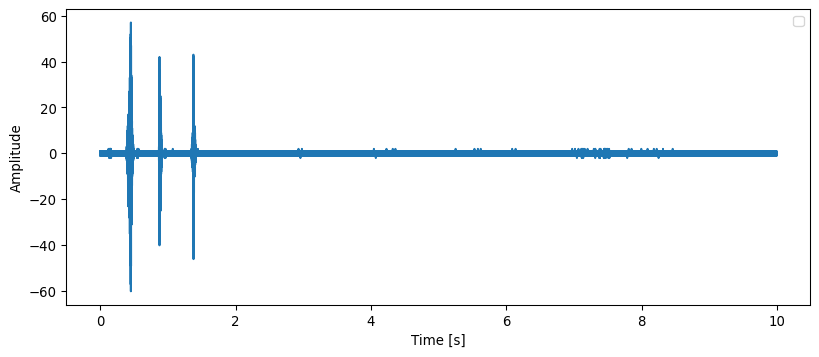

In [39]:
fig,ax=plt.subplots(1,1,figsize=(10,4),dpi=96)
t = np.linspace(0., length, data.shape[0])
plt.plot(t, data)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude");